# EDA: AI & Data Science Job Salaries (2020–2025)

This notebook performs a complete exploratory data analysis (EDA) on the **AI & Data Science Job Salaries (2020–2025)** dataset.

The dataset contains **560 synthetic but realistic salary records** across:
- 10 global tech countries  
- AI & Data Science job roles  
- Skills, tools, models  
- Company sizes & work modes  
- Experience levels  
- Industry categories  
- Job demand index  

This notebook aims to uncover:
- Salary trends  
- Top-paying countries  
- Experience vs salary relationships  
- Important skills and tools  
- Job demand insights  

Let's begin the analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

# Load dataset
df = pd.read_csv("/kaggle/input/ai-and-data-science-job-salaries-20202025/DATA.csv")

df.head()


,job_title,country,city,salary,currency,years_experience,skills,tools_models,work_mode,company_size,industry,year,education,gender,job_demand_index,source
0,Machine Learning Engineer,France,Paris,148500,EUR,15,"PyTorch, TensorFlow, Kubernetes","TensorFlow, ONNX",Remote,Large,Healthcare,2020,Diploma,Male,74,Synthetic approximation based on public salary...
1,LLM Researcher,UAE,Abu Dhabi,643500,AED,15,"Distributed Training, PyTorch, Transformers","Custom LLM, Llama 3",Onsite,Large,Healthcare,2023,PhD,Non-binary,77,Synthetic approximation based on public salary...
2,Data Scientist,France,Marseille,108000,EUR,4,"Scikit-learn, NumPy, Pandas","RandomForest, LightGBM",Remote,Medium,Technology,2022,Bachelors,Non-binary,80,Synthetic approximation based on public salary...
3,Data Scientist,France,Lyon,60000,EUR,2,"SQL, Statistics, Python","RandomForest, LightGBM",Hybrid,Medium,Education,2023,Masters,Female,79,Synthetic approximation based on public salary...
4,Machine Learning Engineer,Canada,Ottawa,105600,CAD,6,"TensorFlow, MLflow, Docker","TensorFlow, PyTorch",Hybrid,Large,Consulting,2024,Masters,Male,92,Synthetic approximation based on public salary...


In [2]:
print("Shape of dataset:", df.shape)
df.info()
df.describe(include='all').T


Shape of dataset: (500, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_title         500 non-null    object
 1   country           500 non-null    object
 2   city              500 non-null    object
 3   salary            500 non-null    int64 
 4   currency          500 non-null    object
 5   years_experience  500 non-null    int64 
 6   skills            500 non-null    object
 7   tools_models      500 non-null    object
 8   work_mode         500 non-null    object
 9   company_size      500 non-null    object
 10  industry          500 non-null    object
 11  year              500 non-null    int64 
 12  education         500 non-null    object
 13  gender            500 non-null    object
 14  job_demand_index  500 non-null    int64 
 15  source            500 non-null    object
dtypes: int64(4), object(12)
memory usa

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
job_title,500,5,Data Scientist,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,500,10,Australia,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,500,35,Singapore,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,500.0,NaN,NaN,NaN,411643.2,648422.607023,55000.0,122375.0,161000.0,270925.0,3408600.0
currency,500,8,EUR,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
years_experience,500.0,NaN,NaN,NaN,8.108,4.586765,0.0,4.0,8.0,12.0,15.0
skills,500,305,"Distributed Training, Deep Learning, Reinforce...",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tools_models,500,46,"ONNX, PyTorch",23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_mode,500,3,Remote,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_size,500,3,Medium,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN


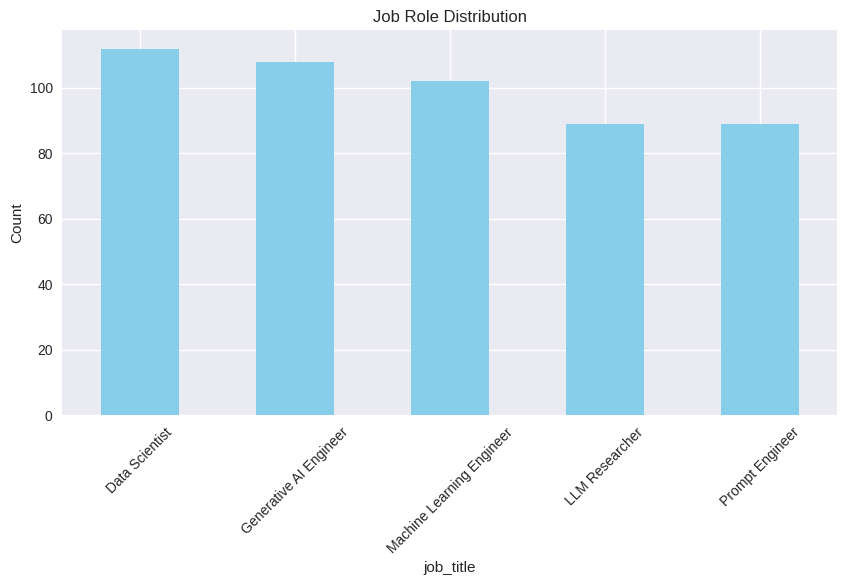

In [3]:
plt.figure(figsize=(10,5))
df['job_title'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Job Role Distribution")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


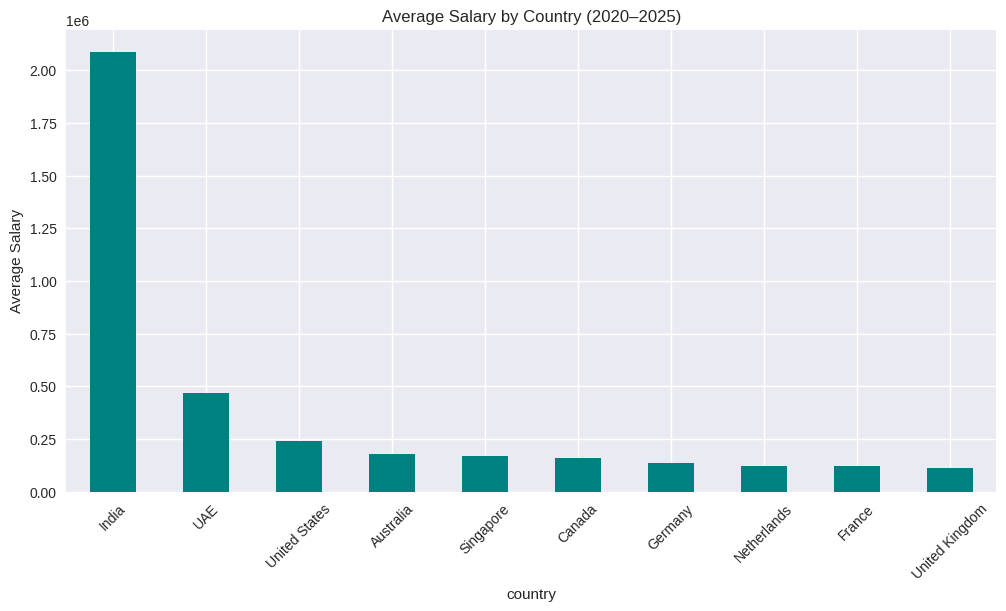

In [4]:
country_salary = df.groupby("country")["salary"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
country_salary.plot(kind="bar", color='teal')
plt.title("Average Salary by Country (2020–2025)")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


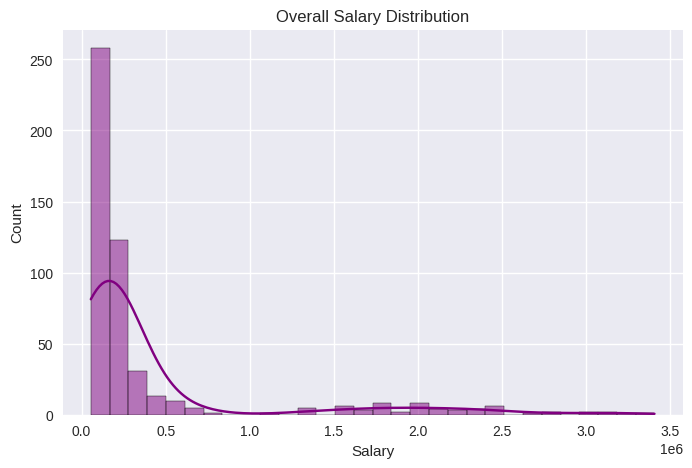

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df["salary"], bins=30, kde=True, color="purple")
plt.title("Overall Salary Distribution")
plt.xlabel("Salary")
plt.show()


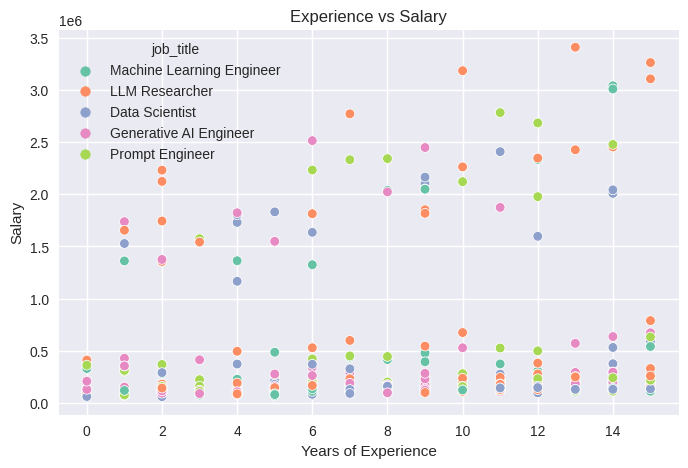

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="years_experience", y="salary", hue="job_title")
plt.title("Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


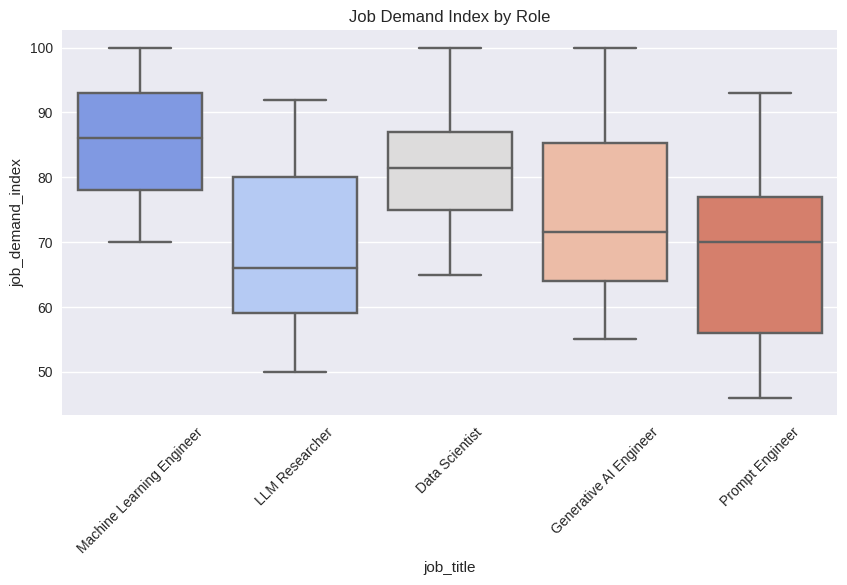

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="job_title", y="job_demand_index", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Job Demand Index by Role")
plt.show()


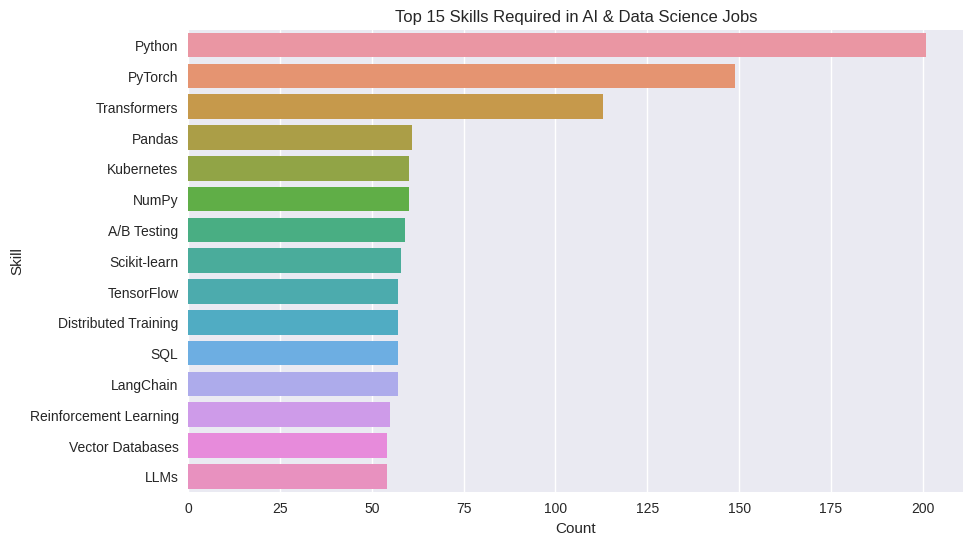

In [8]:
skill_list = []

for s in df["skills"].dropna():
    for item in s.split(","):
        skill_list.append(item.strip())

top_skills = Counter(skill_list).most_common(15)

skills_df = pd.DataFrame(top_skills, columns=["Skill", "Count"])

plt.figure(figsize=(10,6))
sns.barplot(data=skills_df, x="Count", y="Skill")
plt.title("Top 15 Skills Required in AI & Data Science Jobs")
plt.show()


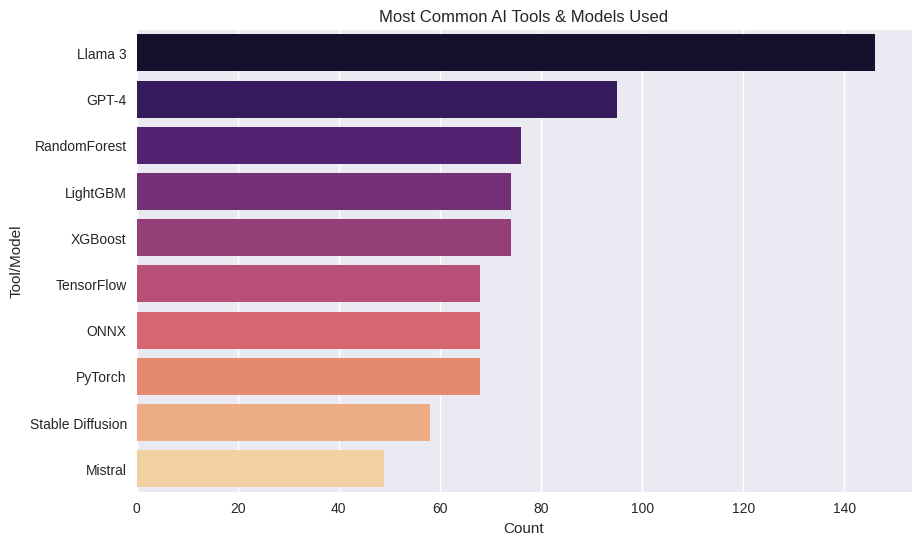

In [9]:
model_list = []

for s in df["tools_models"].dropna():
    for item in s.split(","):
        model_list.append(item.strip())

top_models = Counter(model_list).most_common(10)

models_df = pd.DataFrame(top_models, columns=["Tool/Model", "Count"])

plt.figure(figsize=(10,6))
sns.barplot(data=models_df, x="Count", y="Tool/Model", palette="magma")
plt.title("Most Common AI Tools & Models Used")
plt.show()


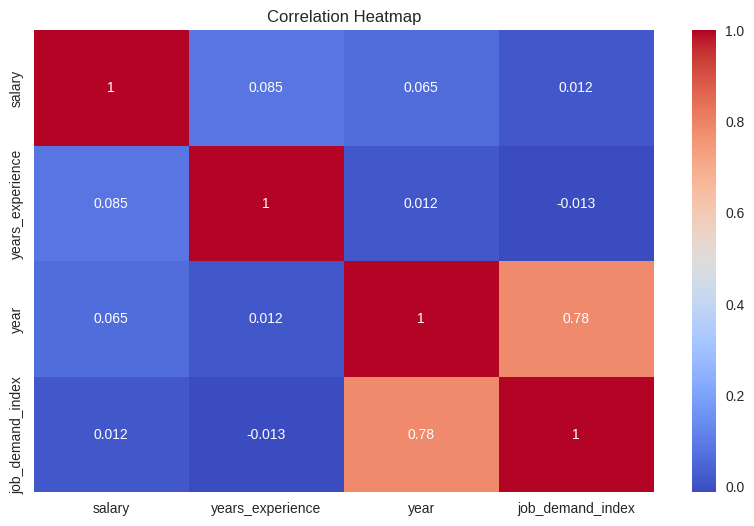

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# Conclusion

Key insights from this analysis:

- The dataset includes **560 records** across multiple countries and AI job roles.  
- Salary levels vary significantly across countries, with some regions consistently paying higher.  
- Job roles such as **ML Engineers, LLM Researchers, and Generative AI Engineers** show high salary ranges.  
- Experience strongly correlates with salary growth.  
- Skills like **Python, SQL, TensorFlow, PyTorch, and LLMs** dominate the job market.  
- Tools/models such as **GPT-4, LLaMA, ONNX, RandomForest** appear frequently.
- Job demand index varies across roles, giving insight into high-demand AI positions.

This notebook provides a strong starting point for further modeling, forecasting, or skill-based segmentation.

Feel free to fork this notebook, explore additional visualizations, or build predictive salary models.
